### Pulling genes by significant SNPs from multivariate GWAS on Starch and Protein

In [1]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

library(tidyverse)
library(ggplot2)
library(pheatmap)
setwd('/panicle/ssapkot/git_repo/StarchProtein/')

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


#### Chromosome 4 and 8 significant SNPs

In [3]:
### SNPs
snps <- read.csv('results/annotation/sigSNPs/SigSNPs_chr4-8.txt', header=T) ##gapit format data only snp position is relevant
snps[,c(1,2,3)]

markerName,chromosome,position
S4_6062375,4,60623675
S4_63400335,4,63400335
S4_64019590,4,64019590
S4_64019619,4,64019619
S4_64019577,4,64019577
S8_51715166,8,51715166
S8_51719704,8,51719704
S8_51720767,8,51720767
S8_51721062,8,51721062
S8_51721065,8,51721065


#### Chromosome 8 significant range

In [6]:
### SNPs
print("Significant SNPs list")
snps <- read.csv('results/annotation/sigSNPs/Chr8_sigSNPs.csv', header=T)
snps[,1:3]
print("----------------------------")
print("Range of Significant SNPs")
range <- read.csv('results/annotation/sigSNPs/Chr8_sigSNPs_range.csv', header=T)
range

[1] "Significant SNPs list"


SNP,Chromosome,Position
S8_51721062,8,51721062
S8_51721065,8,51721065
S8_51726098,8,51726098
S8_51719704,8,51719704
S8_51715166,8,51715166


[1] "----------------------------"
[1] "Range of Significant SNPs"


MarkerName,Chromosome,Pos_highest,Start,End
StartProtein_sig,8,51721062,51715166,51726098


### Putative genes 
Genes within 1 kb of the SNPs were pull using the Sbv3.1.1 gff files. <br />
'/panicle/Scripts/putativeGenesForGWAS.py': the python script used to pull the genes. Syntax: #python put...py --gff gff.sqlite_file --info annotation_info.txt --gwas input_file (in gapit gwas format) --distance 1 (in kb) --output file_with_genes

The output file is cut to get just the genes as one text file with one column: cut -f column_name output_file | sort -u (unique) > Chrx_Sobic_genelist.txt. <br />

Convert IDs from sobic to sb or vice-versa: <br />
'/panicle/Scripts/convertIds.py': the python script to convert gene IDs to desired format.


### Gene expression data

#### Genes near or within significant SNPs

[1] "Davidson et. al. GENE EXPRESSION RESULTS"


GeneID,Gene.Name,floral.meristem,flower,plant.embryo,root,shoot,vegetative.meristem
ENSRNA049436383,tRNA-Arg,NA,12,NA,2,4,NA
ENSRNA049438449,tRNA-Asp,3,NA,NA,NA,NA,NA
ENSRNA049439383,tRNA-Leu,1,NA,NA,NA,3,2
ENSRNA049439505,tRNA-Gln,5,NA,13,NA,NA,6
ENSRNA049439510,tRNA-Gln,4,1,10,NA,NA,NA
ENSRNA049439526,tRNA-Gln,3,NA,NA,2,NA,NA


[1] 5 1

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

GeneID,Gene.Name,floral.meristem,flower,plant.embryo,root,shoot,vegetative.meristem
SORBI_3004G260700,SORBI_3004G260700,2,9,8,7,19.0,3
SORBI_3004G260800,SORBI_3004G260800,195,579,711,316,727.0,187
SORBI_3004G301300,SORBI_3004G301300,26,NA,4,2,0.2,20
SORBI_3008G111500,SORBI_3008G111500,2,10,7,21,13.0,4
SORBI_3008G111600,SORBI_3008G111600,157,43,155,66,22.0,179


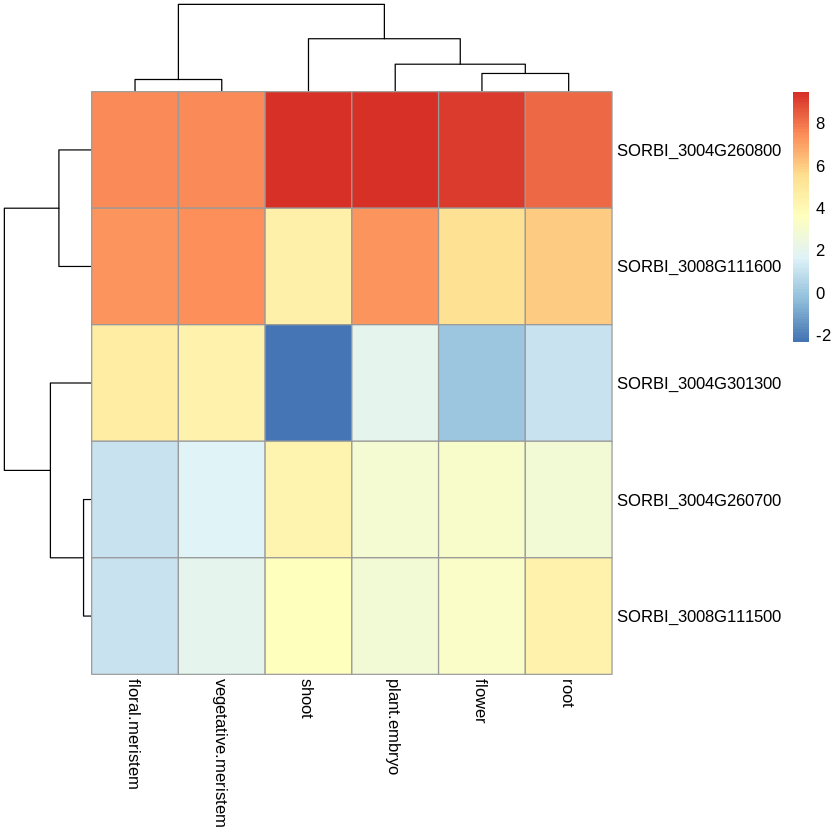

In [7]:
print("Davidson et. al. GENE EXPRESSION RESULTS")
exp <- read.table('results/expression/GeneExp_TPM_Olson.csv', sep=',', header=T)
head(exp)
df1 <- read.table('results/annotation/genes/Chr4_Genes_SORBI.txt',header=T)
#head(df1)
df2 <- read.table('results/annotation/genes/Chr8_Genes_SORBI.txt',header=T)
#head(df2)
df <- rbind(df1,df2)
dim(df)
exp <- df %>% left_join(exp,by='GeneID')
#exp <- exp[-3,]
exp
#exp <- exp[complete.cases(exp),]
log <- log2(exp[,-c(1,2)])
log[is.na(log)] <- 0 
rownames(log) <- exp[,1]
#write.csv(log,'results/expression/Davidson_Original_Genes.csv')

pheatmap(log, cluster_rows=T, cluster_cols=T)

[1] "RIKEN GENE EXPRESSION RESULTS"


GeneID
SORBI_3004G247200
SORBI_3004G250600
SORBI_3004G301500
SORBI_3008G111500
SORBI_3008G111600
SORBI_3010G244000
SORBI_3010G244100


[1] 7 1

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

GeneID,GeneName,seed,spikelet,stem
SORBI_3004G247200,SORBI_3004G247200,52,88,61
SORBI_3004G250600,SORBI_3004G250600,174,31,47
SORBI_3004G301500,NA,NA,NA,NA
SORBI_3008G111500,SORBI_3008G111500,13,9,8
SORBI_3008G111600,SORBI_3008G111600,39,55,76


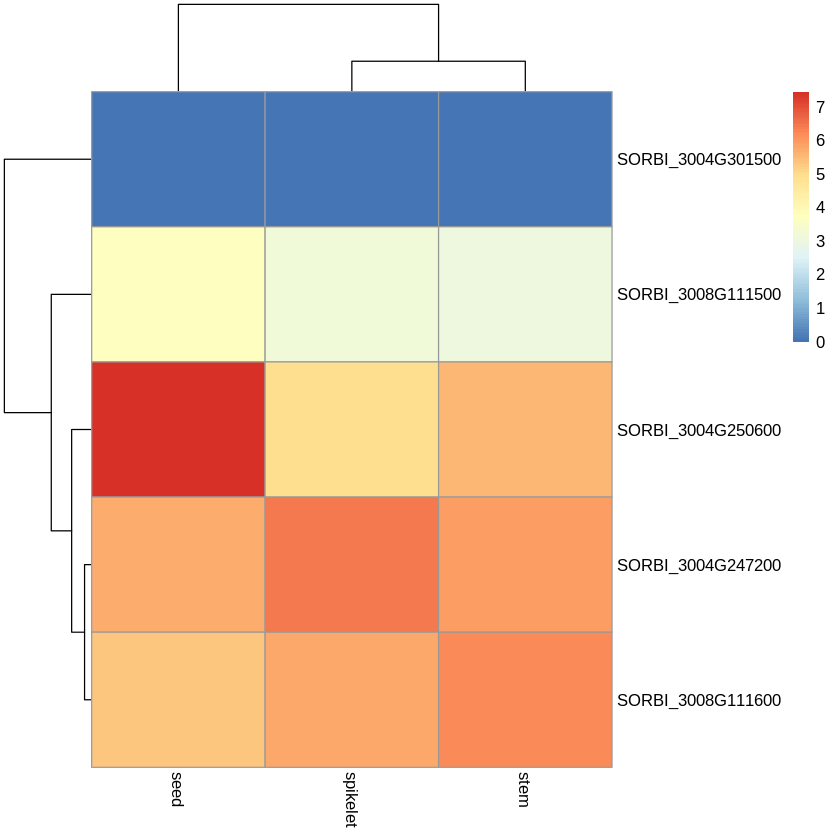

In [17]:
print("RIKEN GENE EXPRESSION RESULTS")
exp <- read.table('results/expression/GeneExp_TPM_RIKEN.tsv', sep='\t', header=T)
df1 <- read.table('results/annotation/Genes/Chr4_1kb_Genes_SORBI.txt',header=T)
#head(df1)
df2 <- read.table('results/annotation/Genes/Chr8_range_genes_SORBI.txt',header=T)
#head(df2)
df3 <- read.table('results/annotation/Genes/Chr10_1kb_genes_SORBI.txt',header=T)
#head(df3)
df <- rbind(df1,df2,df3)
df
dim(df)
exp <- df %>% left_join(exp,by='GeneID')
exp <- exp[-c(6,7),]
exp
#exp <- exp[complete.cases(exp),]
log <- log2(exp[,-c(1,2)])
log[is.na(log)] <- 0 
rownames(log) <- exp[,1]
write.csv(log,'results/expression/RIKEN_GeneExp_log2TPM_AllChr_sigGenes_1kb_8r.csv')


pheatmap(log, cluster_rows=T, cluster_cols=T)

#### Chromosome 4 significant genes and their first interactors
##### Davidson et. al Gene Expression result

In [27]:
df1 <- read.table('results/expression/GeneExp_TPM_Davidson.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/genes/Chr4_GI_Exp_SORBI.txt',header=T)
kegg <- read.table('results/expression/Chr4_Genes_interactors_allFormats.csv',header=T)
exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[-c(2:6,8),]
#exp <- exp[complete.cases(exp),]
annotation <- as.data.frame(exp[,1])
colnames(annotation) <- 'GeneID'

log <- log2(exp[-c(1,2)])
log[is.na(log)] <- 0
#log$Taxa <- exp$GeneID
rownames(log) <- exp$GeneID

pheatmap(log, scale="row", cluster_rows=T, cluster_cols=T)

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

,leaf,early_infl,emer_infl,seed_5DAP,seed_10DAP,anther,pistil,embryo,endosperm,Taxa
SORBI_3002G175400,4.906891,7.022368,6.022368,6.658211,5.044394,6.832890,6.781360,5.044394,3.459432,SORBI_3002G175400
SORBI_3004G260800,10.801708,8.968667,8.299208,8.527477,8.209453,9.116344,8.845490,11.193525,8.082149,SORBI_3004G260800
SORBI_3004G312500,2.000000,2.807355,0.000000,2.321928,2.584963,0.000000,2.000000,2.584963,2.321928,SORBI_3004G312500
SORBI_3006G111700,3.807355,5.643856,5.906891,6.149747,4.169925,4.906891,5.882643,5.357552,3.459432,SORBI_3006G111700
SORBI_3007G153900,9.346514,3.459432,2.584963,1.000000,0.000000,0.000000,0.000000,1.584963,2.000000,SORBI_3007G153900
SORBI_3010G181500,1.584963,7.189825,4.459432,6.599913,3.906891,4.000000,6.247928,4.584963,2.321928,SORBI_3010G181500


Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”Warning message in var(if (is.vector(x) 

ERROR: Error in x - m: non-numeric argument to binary operator


##### RIKEN Gene Expression result

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

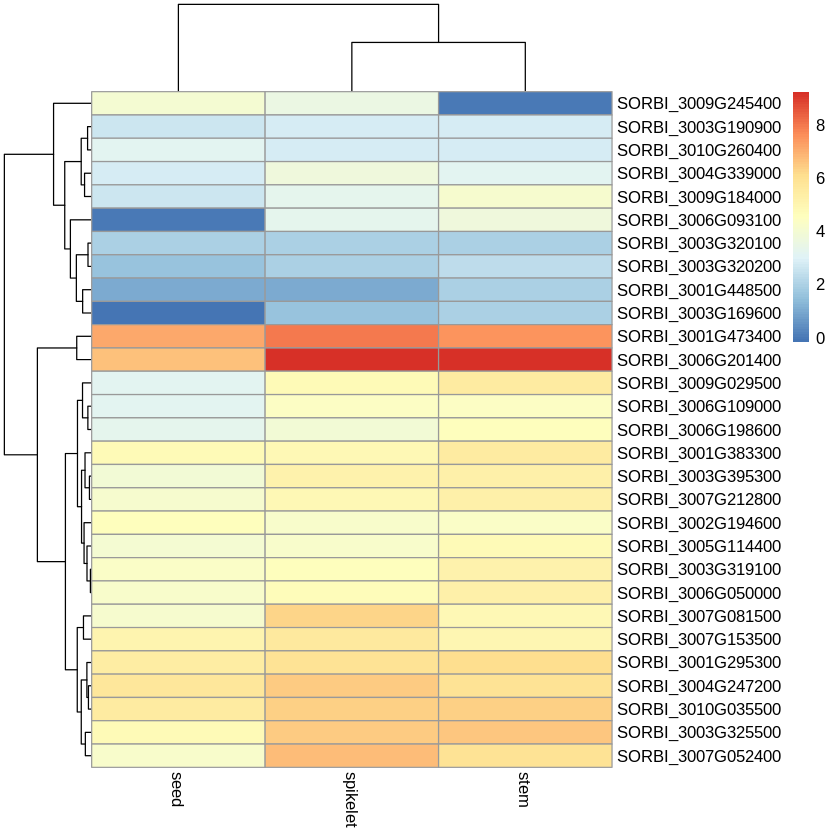

In [64]:
df1 <- read.table('results/expression/GeneExp_TPM_RIKEN.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/Genes_interactors/Genes_Interactors_Chr4_1Kb_SORBI.txt',header=T)

exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[complete.cases(exp),]

log <- log2(exp[-c(1,2)])
log[is.na(log)] <- 0 
rownames(log) <- exp$GeneID
pheatmap(log, cluster_rows=T, cluster_cols=T)

#### Chromosome 8 significant genes and their first interactors
Using medium confidenc(0.7 or 700) interactors
##### Davidson et. al Gene Expression result

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

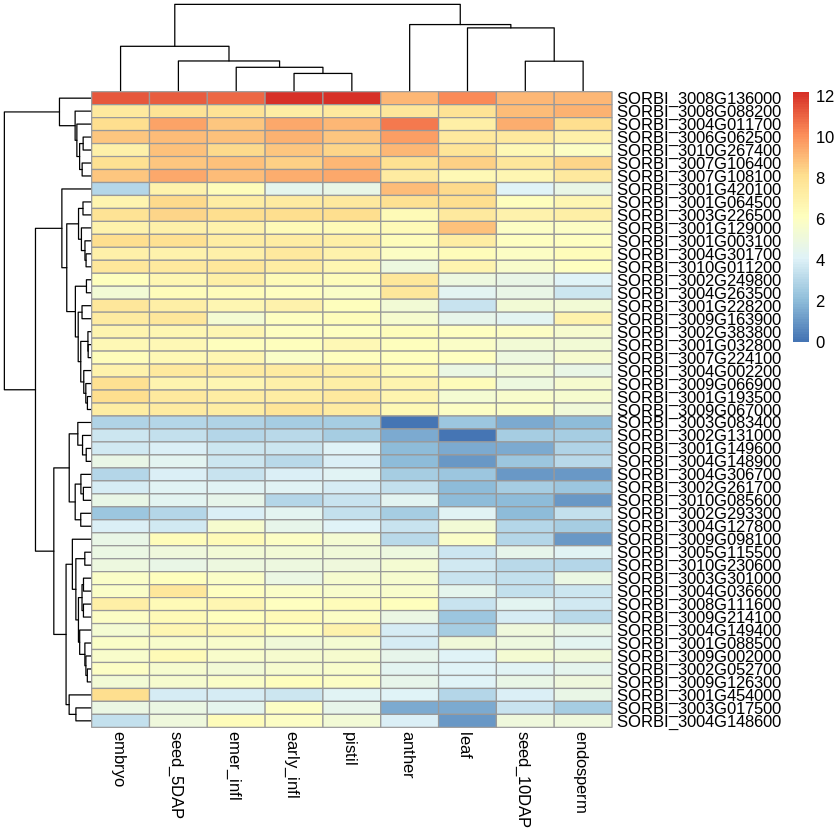

In [69]:
df1 <- read.table('results/expression/GeneExp_TPM_Davidson.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/Genes_interactors/Genes_Interactors_Chr8_conf0.7_SORBI.txt',header=T)

exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[complete.cases(exp),]
log <- log2(exp[-c(1,2)])
log[is.na(log)] <- 0
rownames(log) <- exp$GeneID
pheatmap(log, cluster_rows=T, cluster_cols=T)

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

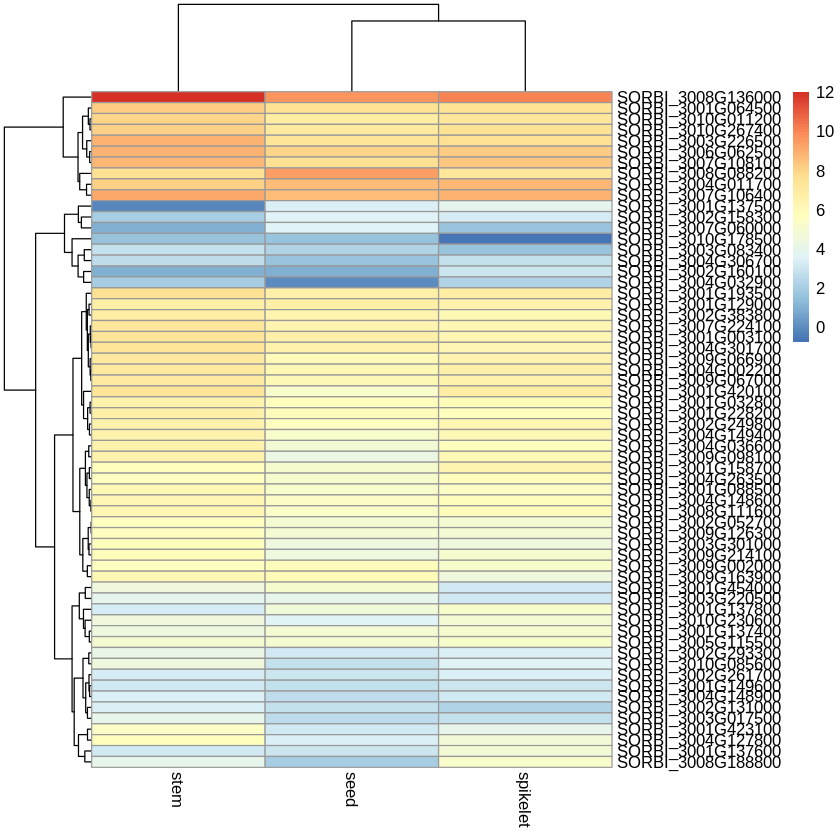

In [70]:
df1 <- read.table('results/expression/GeneExp_TPM_RIKEN.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/Genes_interactors/Genes_Interactors_Chr8_conf0.7_SORBI.txt',header=T)

exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[complete.cases(exp),]
log <- log2(exp[-c(1,2)])
log[is.na(log)] <- 0
rownames(log) <- exp$GeneID
pheatmap(log, cluster_rows=T, cluster_cols=T)

### Combining chr 4, 8 and 10 genes and interactors

In [10]:
#while (!is.null(dev.list()))  dev.off()
df1 <- read.table('results/annotation/genes/Chr4_GI_Exp_SORBI.txt',header=T)
df1 <- unique(df1)
df1$group <- 'Chr4'
df2 <- read.table('results/annotation/genes/Chr8_GI_Exp_SORBI.txt',header=T)
df2 <- unique(df2)
df2$group <- 'Chr8'
df4 <- rbind(df1,df2)
head(df4)
dim(df4)
# df <- rbind(df4,df)
# dim(df)


exp <- read.table('results/expression/GeneExp_TPM_Olson.csv', sep=',', header=T)
exp1 <- df4 %>% left_join(exp, by="GeneID")
exp1 <- exp1[complete.cases(exp1),]
#exp1[is.na(exp1)] <- 1
exp1
log <- log2(exp1[,-c(1,2,3)])
rownames(log) <- exp1$GeneID
annotation <- data.frame(exp1[,2])
rownames(annotation) <- rownames(log)
colnames(annotation) <- c('group')
dim(annotation)
log$group <- exp1$group
write.csv(log, 'results/expression/Olson_GeneExp_GenesInteractors.csv',row.names=TRUE)
dim(log)
#png('results/expression/Heatmap_GeneExp_Chr4_8_GenesInteractors.png', height=900,width=900)
#pheatmap(log, cluster_rows=T, cluster_cols=T, angle_col=45)
#dev.off()

GeneID,group
SORBI_3002G175400,Chr4
SORBI_3003G187800,Chr4
SORBI_3003G270400,Chr4
SORBI_3003G300200,Chr4
SORBI_3004G196101,Chr4
SORBI_3004G260600,Chr4


[1] 138   2

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

,GeneID,group,Gene.Name,floral.meristem,flower,plant.embryo,root,shoot,vegetative.meristem
1,SORBI_3002G175400,Chr4,SORBI_3002G175400,60.0,58.0,38.0,28.0,75.0,60.0
6,SORBI_3004G260600,Chr4,DES2,0.2,0.5,0.9,3.0,1.0,0.1
7,SORBI_3004G260800,Chr4,SORBI_3004G260800,195.0,579.0,711.0,316.0,727.0,187.0
9,SORBI_3004G312500,Chr4,SORBI_3004G312500,7.0,0.1,7.0,258.0,5.0,5.0
10,SORBI_3006G111700,Chr4,SORBI_3006G111700,56.0,39.0,51.0,23.0,22.0,69.0
11,SORBI_3007G153900,Chr4,SORBI_3007G153900,0.9,6.0,1.0,260.0,212.0,0.8
12,SORBI_3010G181500,Chr4,SORBI_3010G181500,52.0,18.0,36.0,34.0,29.0,53.0
13,SORBI_3001G003100,Chr8,SORBI_3001G003100,129.0,77.0,334.0,180.0,182.0,174.0
14,SORBI_3001G032800,Chr8,SORBI_3001G032800,114.0,77.0,104.0,72.0,48.0,103.0
16,SORBI_3001G064500,Chr8,SORBI_3001G064500,327.0,184.0,183.0,210.0,93.0,288.0


[1] 110   1

[1] 110   7

In [13]:
### merging all genes and interactors from different chromosomes into one
c4 <- read.table('results/annotation/Genes_interactors/pub/Chr4_genes_interactors_700_range.txt', header=F)
c8 <- read.table('results/annotation/Genes_interactors/Chr8_genes_interactors_700_range.txt', header=F)
c10 <- read.table('results/annotation/Genes_interactors/pub/Chr10_genes_interactors_700_range.txt', header=F)

df.gi <- rbind(c4,c8,c10)
dim(df.gi)
df.g <- unique(df.gi)
dim(df.g)

write.csv(df.g,'results/annotation/Genes_interactors/pub/AllChr_genes_interactors_range_original.txt',row.names=F)

[1] 129   1

[1] 129   1

In [19]:
## Making a df with all there sb, sobic, sorbi format for all genes.
df1 <- read.table('results/annotation/genes//Chr8_Genes_Interactors_Sobic2Sb.txt',header=F)
df2 <- read.table('results/annotation/genes/Chr8_Genes_Interactors_Sobic.txt',header=F)
df <- cbind(df1,df2,df2)
colnames(df) <- c('SbID','SobicID','GeneID')
dim(df)
df
write.csv(df, 'results/annotation/Chr8_Genes_interactors_allFormats.csv',row.names=F)

[1] 134   3

SbID,SobicID,GeneID
Sb01g000380,Sobic.001G003100,Sobic.001G003100
Sb01g003070,Sobic.001G032800,Sobic.001G032800
Sb01g003220,Sobic.001G034400,Sobic.001G034400
Sb01g005860,Sobic.001G064500,Sobic.001G064500
Sb01g007980,Sobic.001G088500,Sobic.001G088500
Sb01g010460,Sobic.001G118600,Sobic.001G118600
Sb01g010650,Sobic.001G120500,Sobic.001G120500
Sb01g011310,Sobic.001G129000,Sobic.001G129000
Sb01g012000,Sobic.001G137400,Sobic.001G137400
Sb01g012010,Sobic.001G137500,Sobic.001G137500
